In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Major_Project_2022/CM1.csv')

       defects
False      449
True        49




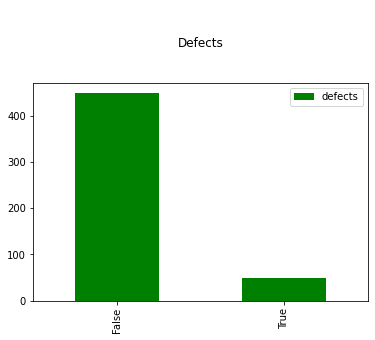

In [ ]:
defect_true_false = pd.DataFrame(dataset['defects'])
df1 = defect_true_false.apply(pd.value_counts)
print(df1)
print("\n")
df1.plot.bar(color='green', title="\n\nDefects - CM1\n\n")

In [ ]:
def complexity_evaluation(dataset):
  evaluation = (dataset.n < 300) & (dataset.v < 1000) & (dataset.d < 50) & (dataset.e < 500000) & (dataset.t < 5000)
  dataset['complexityAnalysis'] = pd.DataFrame(evaluation)
  dataset['complexityAnalysis'] = ['Successful' if eval == True else 'Redesign' for eval in dataset.complexityAnalysis]

complexity_evaluation(dataset)
dataset.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityAnalysis
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,Successful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,Successful
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,0,6,0,15.0,15.0,44.0,19.0,9.0,False,Successful
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,3,0,16.0,8.0,31.0,16.0,7.0,False,Successful
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,3,0,16.0,12.0,46.0,26.0,11.0,False,Successful


            complexityAnalysis
Successful                 386
Redesign                   112




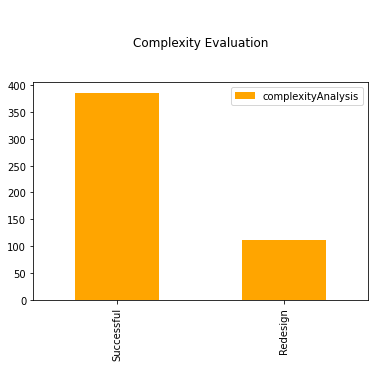

In [ ]:
complexityEvaluation = pd.DataFrame(dataset['complexityAnalysis'])
df2 = complexityEvaluation.apply(pd.value_counts)
print(df2)
print("\n")
df2.plot.bar(color='orange', title="\n\nComplexity Evaluation - CM1\n\n")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loc                 498 non-null    float64
 1   v(g)                498 non-null    float64
 2   ev(g)               498 non-null    float64
 3   iv(g)               498 non-null    float64
 4   n                   498 non-null    float64
 5   v                   498 non-null    float64
 6   l                   498 non-null    float64
 7   d                   498 non-null    float64
 8   i                   498 non-null    float64
 9   e                   498 non-null    float64
 10  b                   498 non-null    float64
 11  t                   498 non-null    float64
 12  lOCode              498 non-null    int64  
 13  lOComment           498 non-null    int64  
 14  lOBlank             498 non-null    int64  
 15  locCodeAndComment   498 non-null    int64  
 16  uniq_Op 

In [ ]:
X = dataset.iloc[:, :-10].values
Y = dataset.complexityAnalysis.values

In [ ]:
#Test train data split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [ ]:
#MinMax Scaling

minmax_scaler = preprocessing.MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)

1. MLP
2. SVM
3. Bagging
4. Random Forest
5. Naive Bayes
6. Multinomial NB
7. KNN
8. ADA Boost
9. Decision Tree
10. Logistic Regression

In [ ]:
classifier_mlp = MLPClassifier()
classifier_svm = SVC(kernel='sigmoid', gamma=1.0)
classifier_dtc = DecisionTreeClassifier(max_depth=5)
classifier_abc = AdaBoostClassifier(n_estimators=50, random_state=2)
classifier_gnb = GaussianNB()
classifier_knn = KNeighborsClassifier()
classifier_mnb = MultinomialNB()
classifier_bc = BaggingClassifier(n_estimators=50, random_state=2)
classifier_rfc = RandomForestClassifier(n_estimators=50, random_state=2)
classifier_lr = LogisticRegression()

In [ ]:
classifiers = {
    'MLP' : classifier_mlp,
    'SVM' : classifier_svm,
    'DT' : classifier_dtc,
    'ABC' : classifier_abc,
    'GNB' : classifier_gnb,
    'KNN' : classifier_knn,
    'MNB' : classifier_mnb,
    'BC' : classifier_bc,
    'RFC' : classifier_rfc,
    'LR' : classifier_lr
}

In [ ]:
def train_classifier(classifier, X_train, Y_train, X_test, Y_test):
    classifier.fit(X_train, Y_train)
    Y_prediction = classifier.predict(X_test)
    acc_score = accuracy_score(Y_test,Y_prediction)
    prec_score = precision_score(Y_test, Y_prediction, average="binary", pos_label='Successful')
    recall = recall_score(Y_test, Y_prediction, average="binary", pos_label='Successful')
    f_score = f1_score(Y_test, Y_prediction, average="binary", pos_label='Successful')
    cm = confusion_matrix(Y_test, Y_prediction)
    
    return acc_score, prec_score, recall, f_score, cm

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


For  MLP
Accuracy -  0.97
Precision -  0.9634146341463414
Recall -  1.0
F1 Score -  0.9813664596273292


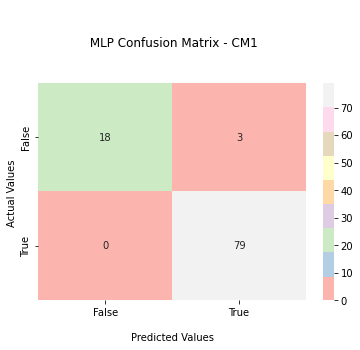

For  SVM
Accuracy -  0.98
Precision -  0.9753086419753086
Recall -  1.0
F1 Score -  0.9875


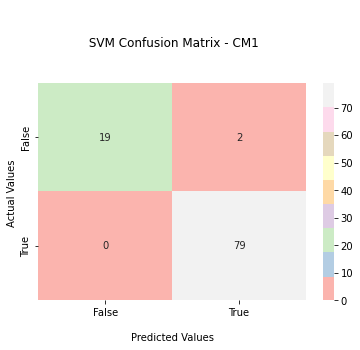

For  DT
Accuracy -  1.0
Precision -  1.0
Recall -  1.0
F1 Score -  1.0


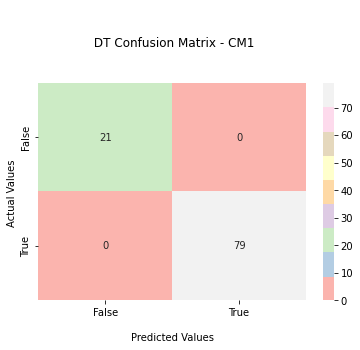

For  ABC
Accuracy -  1.0
Precision -  1.0
Recall -  1.0
F1 Score -  1.0


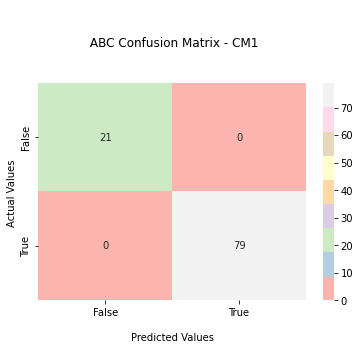

For  GNB
Accuracy -  0.98
Precision -  1.0
Recall -  0.9746835443037974
F1 Score -  0.9871794871794872


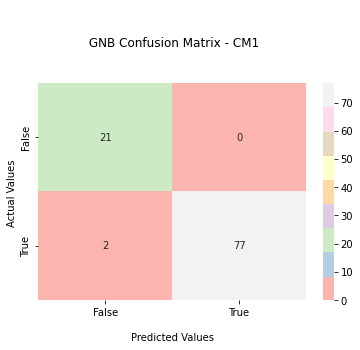

For  KNN
Accuracy -  0.98
Precision -  0.9753086419753086
Recall -  1.0
F1 Score -  0.9875


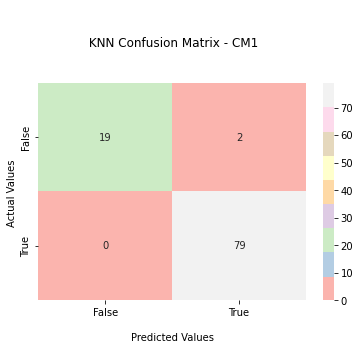

For  MNB
Accuracy -  0.85
Precision -  0.8404255319148937
Recall -  1.0
F1 Score -  0.9132947976878613


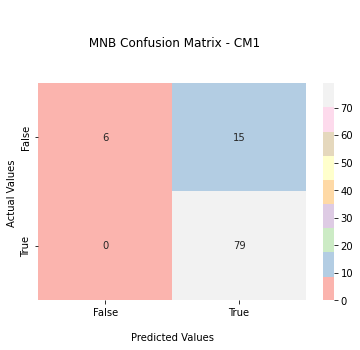

For  BC
Accuracy -  1.0
Precision -  1.0
Recall -  1.0
F1 Score -  1.0


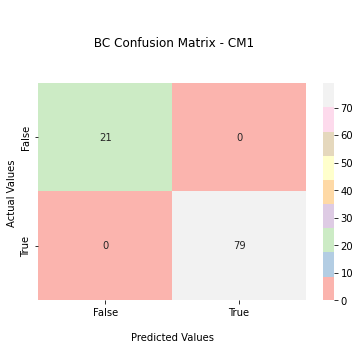

For  RFC
Accuracy -  1.0
Precision -  1.0
Recall -  1.0
F1 Score -  1.0


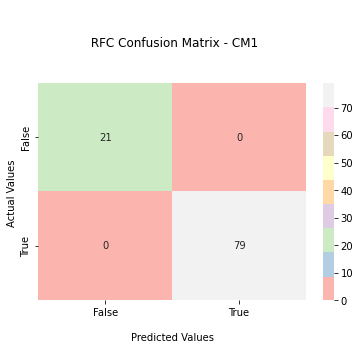

For  LR
Accuracy -  0.96
Precision -  0.9518072289156626
Recall -  1.0
F1 Score -  0.9753086419753086


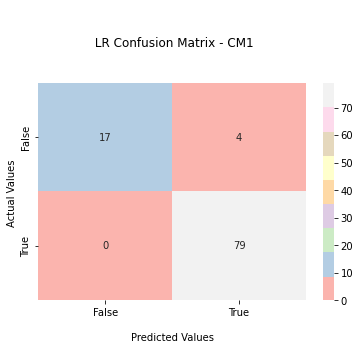

In [ ]:
accuracy_scores = []
precision_scores = []
recalls = []
f1_scores = []

for name,clf in classifiers.items():
    
    current_accuracy, current_precision, current_recall, current_f1score, current_cm = train_classifier(clf, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("F1 Score - ",current_f1score)
    ax = sns.heatmap(current_cm, annot=True, cmap='Pastel1')
    ax.set_title('\n\n {} Confusion Matrix - CM1\n\n'.format(name));
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recalls.append(current_recall)
    f1_scores.append(current_f1score)

In [ ]:
performance_df = pd.DataFrame({'Algorithm':classifiers.keys(),'Accuracy':accuracy_scores, 'Precision':precision_scores, 'Recall':recalls, 'F1-Score':f1_scores}).reset_index(drop=True)
performance_df

,Algorithm,Accuracy,Precision,Recall,F1-Score
0,MLP,0.97,0.963415,1.000000,0.981366
1,SVM,0.98,0.975309,1.000000,0.987500
2,DT,1.00,1.000000,1.000000,1.000000
3,ABC,1.00,1.000000,1.000000,1.000000
4,GNB,0.98,1.000000,0.974684,0.987179
5,KNN,0.98,0.975309,1.000000,0.987500
6,MNB,0.85,0.840426,1.000000,0.913295
7,BC,1.00,1.000000,1.000000,1.000000
8,RFC,1.00,1.000000,1.000000,1.000000
9,LR,0.96,0.951807,1.000000,0.975309


Text(0.5, 1.0, 'CM1 Results')

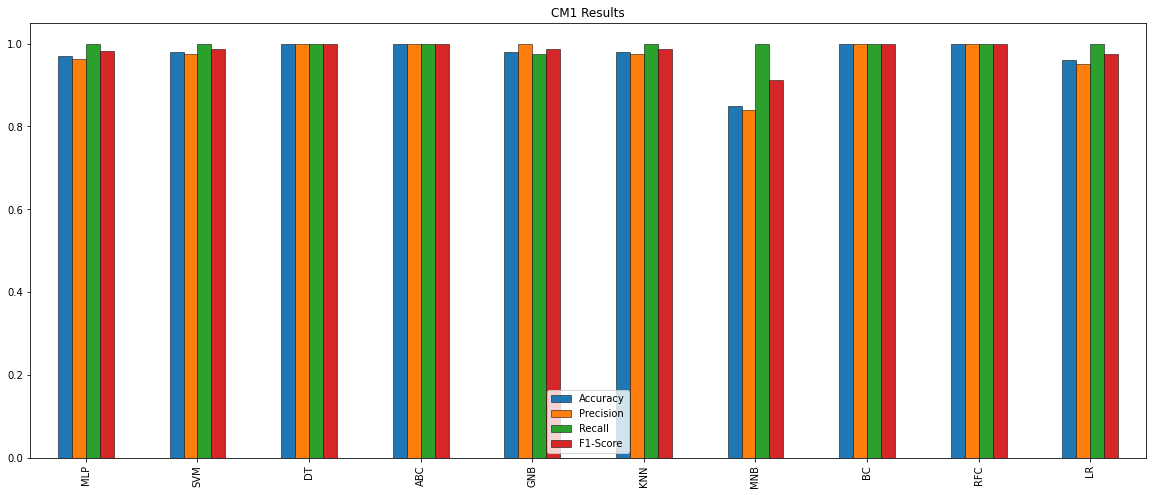

In [ ]:
algos = pd.Series(performance_df['Algorithm'])
acc = pd.Series(performance_df['Accuracy'])
pres = pd.Series(performance_df['Precision'])
rec = pd.Series(performance_df['Recall'])
f1 = pd.Series(performance_df['F1-Score'])
performance_df.plot(kind="bar", figsize=(20, 8), edgecolor='k', linewidth=0.5).set_xticklabels(performance_df['Algorithm'])
plt.title("CM1 Results")

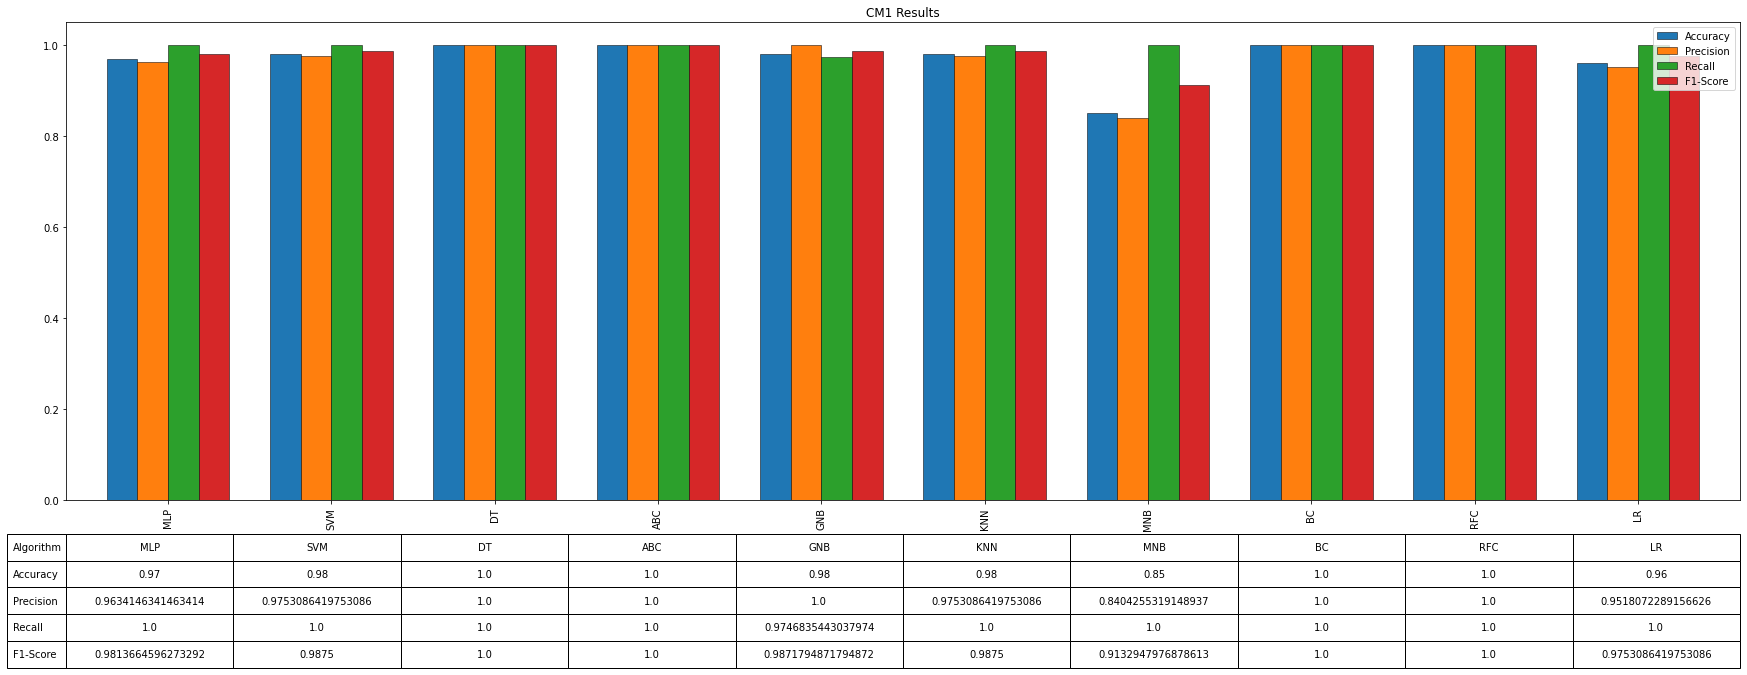

In [ ]:
algos = pd.Series(performance_df['Algorithm'])
acc = pd.Series(performance_df['Accuracy'])
pres = pd.Series(performance_df['Precision'])
rec = pd.Series(performance_df['Recall'])
f1 = pd.Series(performance_df['F1-Score'])
performance_df.plot(kind="bar", width=0.75, figsize=(30, 8), edgecolor='k', linewidth=0.5).set_xticklabels(performance_df['Algorithm'])
plt.title("CM1 Results")
ax_table = plt.table(cellText=[algos,acc,pres,rec,f1],
          rowLabels=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
          loc='bottom', bbox=[0.0,-0.35,1,.28], cellLoc='center')

plt.subplots_adjust(bottom=0.05)
plt.show()